In [4]:
#Versão 1.0
#Para futuras versões: Adicionar mais questionamentos e traduzir os tipos de pokemon para portugues
########################################
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("Setup Complete")

Setup Complete


# Análise de status dos pokemons

## Objetivos

Essa analise de dados busca compreender as seguintes questões:

1. Relação do tipo do pokemon com a base de ataque e de super ataque.
2. Pokemons lendarios por geração.
3. Tipo de pokemon mais comum por geração.
4. Melhores pokemons por status.
5. Relação entre pokemons que possuem apenas um tipo e pokemons que possuem 2 tipos

### 0. Preparando o dataframe

In [5]:
# Leitura do dataframe e visualização das primeiras linhas
pokemon_data = pd.read_csv('Dados/Pokemon.csv')
pokemon_data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [6]:
print('Essa database que estamos analisando contem {} linhas e {} colunas'.format(pokemon_data.shape[0], pokemon_data.shape[1]))

Essa database que estamos analisando contem 800 linhas e 13 colunas


In [7]:
# Primeiramente vamos alterar os nomes das colunas
pokemon_data.columns = ["#","Nome","Tipo1","Tipo2", "Total", "HP","Ataque", "Defesa","SuperAtaque", "SuperDefesa","Velocidade","Geracao","Lendario"]
pokemon_data.head()

,#,Nome,Tipo1,Tipo2,Total,HP,Ataque,Defesa,SuperAtaque,SuperDefesa,Velocidade,Geracao,Lendario
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [38]:
# Além disso é preciso traduzir os tipos
# Para tanto, vamos analisar o tipos de pokemon contidos nesse dataframe
#pokemon_data['Tipo1'].unique()

In [9]:
# Criação do dicionário com a tradução dos tipos de pokemon
#traducao = {'Grass' : 'Grama', 'Fire':'Fogo','Water': 'Agua', 'Bug':'Inseto','Normal':'Normal','Poison':'Veneno',
           # 'Electric':'Eletrico','Ground':'Terra','Fairy':'Fada','Fighting':'Lutador','Psychic':'Psiquico','Rock':'Pedra'
           #'Ghost':'Fantasma','Ice':'Gelo','Dragon':'Dragão','Dark':'Noturno', 'Steel':'Aco','Flying':'Voador'}


### 1. Relação do tipo do pokemon com a base de ataque e de super ataque

In [50]:
# Serie com a relação crescente de ataque baseada no tipo do pokemon
ataque_medio_por_tipo_data = pokemon_data.groupby("Tipo1").Ataque.mean().sort_values(ascending = False).to_frame().reset_index()
ataque_medio_por_tipo_data

,Tipo1,Ataque
0,Dragon,112.125000
1,Fighting,96.777778
2,Ground,95.750000
3,Rock,92.863636
4,Steel,92.703704
5,Dark,88.387097
6,Fire,84.769231
7,Flying,78.750000
8,Poison,74.678571
9,Water,74.151786


<AxesSubplot:title={'center':'Ataque médio por tipo de pokemon'}, xlabel='Tipo1', ylabel='Ataque'>

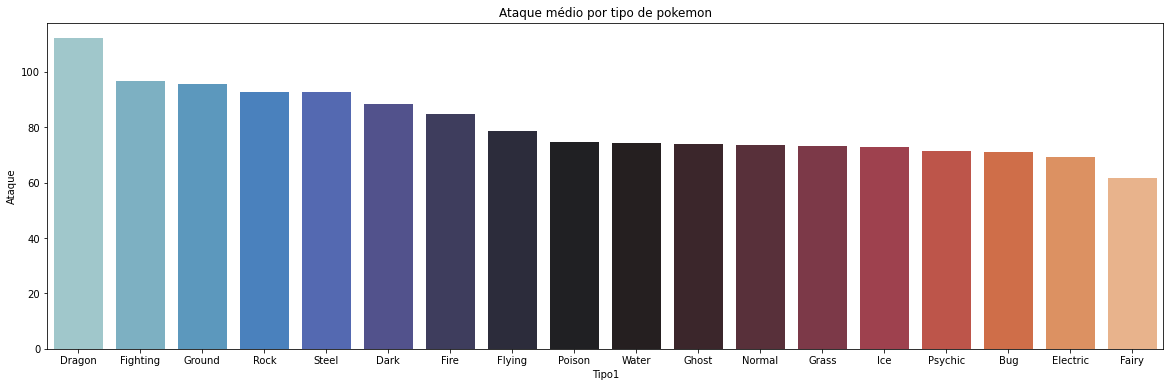

In [40]:
# Selecionando o tamanho da imagem, título e finalmente plotando o gráfico
plt.figure(figsize = (20, 6))
plt.title('Ataque médio por tipo de pokemon')
sns.barplot(x = ataque_medio_por_tipo_data['Tipo1'], y = ataque_medio_por_tipo_data['Ataque'], palette= "icefire")

In [48]:
# Serie com a relação crescente de super ataque baseada no tipo do pokemon
super_ataque_medio_por_tipo = pokemon_data.groupby("Tipo1")['SuperAtaque'].mean().sort_values(ascending = False).to_frame().reset_index()
super_ataque_medio_por_tipo

,Tipo1,SuperAtaque
0,Psychic,98.403509
1,Dragon,96.843750
2,Flying,94.250000
3,Electric,90.022727
4,Fire,88.980769
5,Ghost,79.343750
6,Fairy,78.529412
7,Ice,77.541667
8,Grass,77.500000
9,Water,74.812500


<AxesSubplot:title={'center':'Super ataque médio por tipo de pokemon'}, xlabel='Tipo1', ylabel='SuperAtaque'>

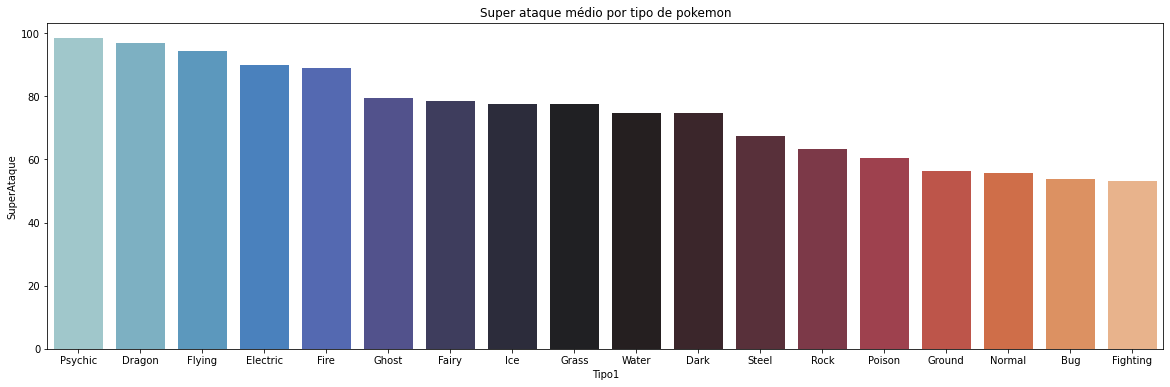

In [46]:
# Selecionando o tamanho da imagem, título e finalmente plotando o gráfico
plt.figure(figsize = (20, 6))
plt.title('Super ataque médio por tipo de pokemon')
sns.barplot(x = super_ataque_medio_por_tipo['Tipo1'], y = super_ataque_medio_por_tipo['SuperAtaque'], palette= "icefire")

### 2. Pokemons lendarios por geração.

In [30]:
#Para essa análise precisamos retirar os pokemons que contem a string "Primal" e "Mega"

pokemon_sem_mega_primal = pokemon_data.loc[~ pokemon_data['Nome'].str.contains('Mega') & ~ pokemon_data['Nome'].str.contains('Primal')]
pokemon_lendario = pokemon_sem_mega_primal.loc[pokemon_sem_mega_primal['Lendario'] == True]
pokemon_lendario.groupby('Geracao')['Nome'].count()

Geracao
1     4
2     5
3    13
4    13
5    15
6     7
Name: Nome, dtype: int64

<AxesSubplot:title={'center':'Pokemons lendários por geracao'}, xlabel='Geracao', ylabel='count'>

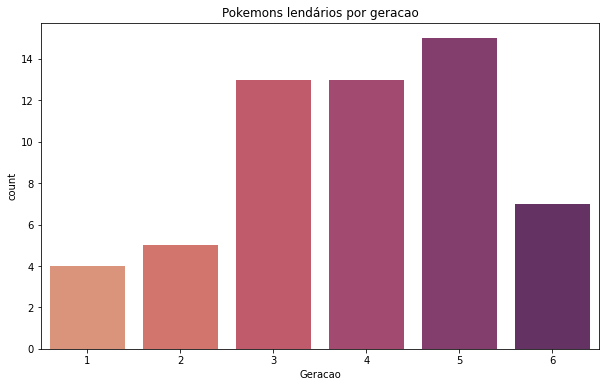

In [42]:
plt.figure(figsize = (10, 6))
plt.title('Pokemons lendários por geracao')
sns.countplot(x = pokemon_lendario['Geracao'],  palette = "flare")

### 3. Tipo de pokemon mais comum por geração

In [97]:

#tipos1_por_geracao = pokemon_sem_mega_primal.groupby('Geracao')['Tipo1'].value_counts().to_frame()
#tipos1_por_geracao.columns = ['Quantidade']
#tipos1_por_geracao = tipos1_por_geracao.reset_index()
#tipos1_por_geracao

,#,Total,HP,Ataque,Defesa,SuperAtaque,SuperDefesa,Velocidade,Lendario
Geracao,,,,,,,,,
1,11476,61469,9696,10955,10302,10138,9969,10409,4.0
2,19996,40093,6978,6744,6849,6347,7114,6061,5.0
3,44223,56078,8965,10215,9536,9451,9213,8698,13.0
4,51280,52424,8442,9279,8957,8734,8859,8153,13.0
5,94224,71228,11742,13481,11808,11798,11216,11183,15.0
6,55698,35083,5548,6056,6178,5932,6031,5338,7.0


In [102]:
tipos2_por_geracao = pokemon_sem_mega_primal.groupby('Geracao')['Tipo2'].value_counts().to_frame()
tipos2_por_geracao.columns = ['Quantidade']
tipos2_por_geracao = tipos2_por_geracao.reset_index()
tipos2_por_geracao

a = tipos2_por_geracao.iloc['Geracao' == '1' & 'Tipo2' == "Flying"]
a

TypeError: unsupported operand type(s) for &: 'str' and 'str'

In [89]:

tipos1_por_geracao.compare(tipos1_por_geracao)

AttributeError: 'DataFrame' object has no attribute 'compare'

### 4. Melhores pokemons por status

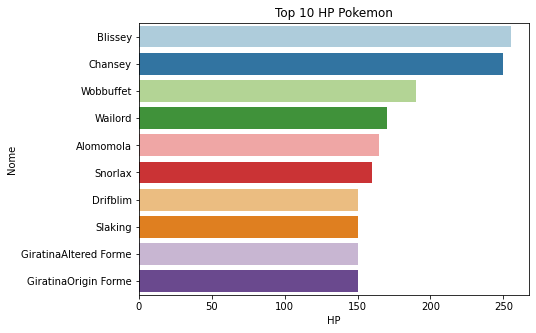

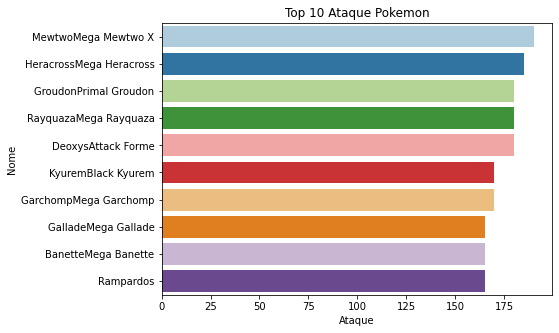

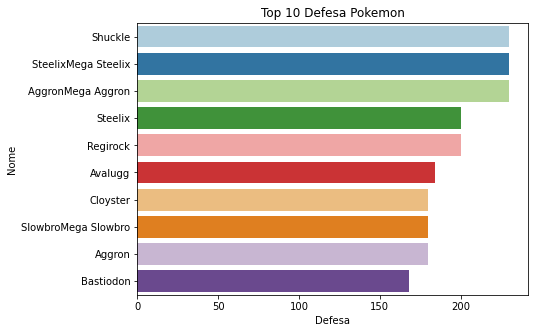

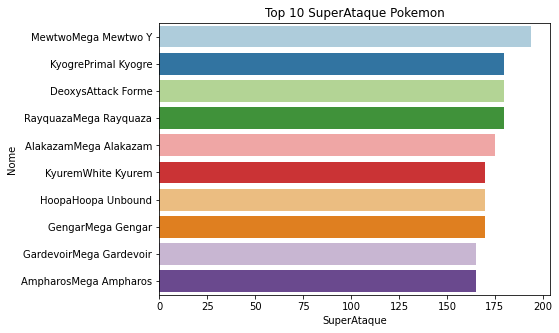

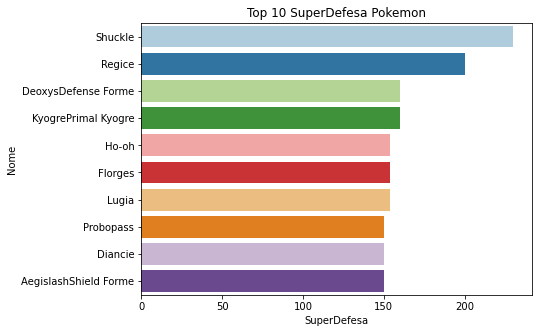

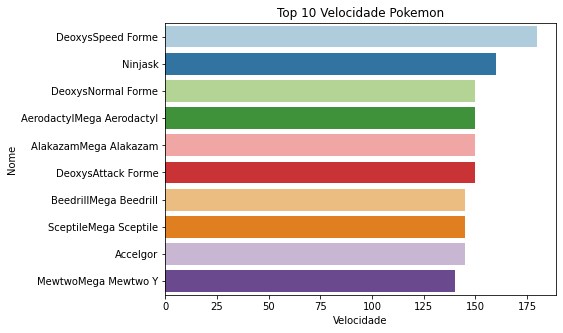

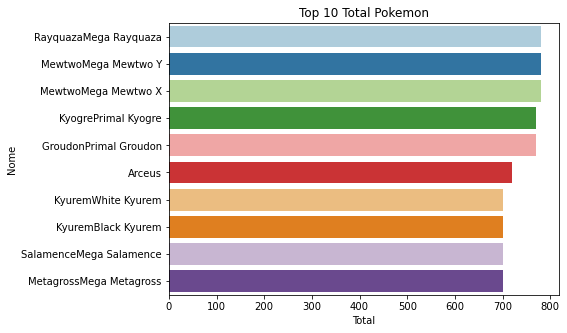

In [55]:
#Definição da função que plota os 10 melhores pokemons de acordo com os status do dataframe inicial
status = ["HP", "Ataque", "Defesa", "SuperAtaque", "SuperDefesa", "Velocidade", "Total"]
def top_stats(variable):
    stat_top10 = pokemon_data.sort_values(by=[variable], ascending = False).head(10)
    fig, axs = plt.subplots(figsize=(7,5))
    sns.barplot(data=stat_top10, x=variable, y="Nome", palette = "Paired")
    plt.title("Top 10 "+variable+" Pokemon")
    plt.show()

for i in status:
    top_stats(i)